In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
precision_path = r"csv\Precission.csv"
recall_path = r"csv\Recall.csv"
train_loss_path = r"csv\train_loss.csv"
eval_loss_path = r"csv\eval_loss.csv"
confusion_matrix_path = r'csv\confusion_matrix.csv'

In [13]:
df_confusion_matrix = pd.read_csv(confusion_matrix_path,header=None)

In [20]:
confusion_matrix = df_confusion_matrix.values.astype(float)

In [21]:
df_precision = pd.read_csv(precision_path)
df_recall = pd.read_csv(recall_path)
df_train_loss = pd.read_csv(train_loss_path)
df_eval_loss = pd.read_csv(eval_loss_path)

In [22]:
df_precision = df_precision.drop(columns=['Wall time'])
df_recall = df_recall.drop(columns=['Wall time'])
df_train_loss = df_train_loss.drop(columns=['Wall time'])
df_eval_loss = df_eval_loss.drop(columns=['Wall time'])

In [23]:
df_f1_score = 2 * df_precision * df_recall / (df_precision + df_recall)

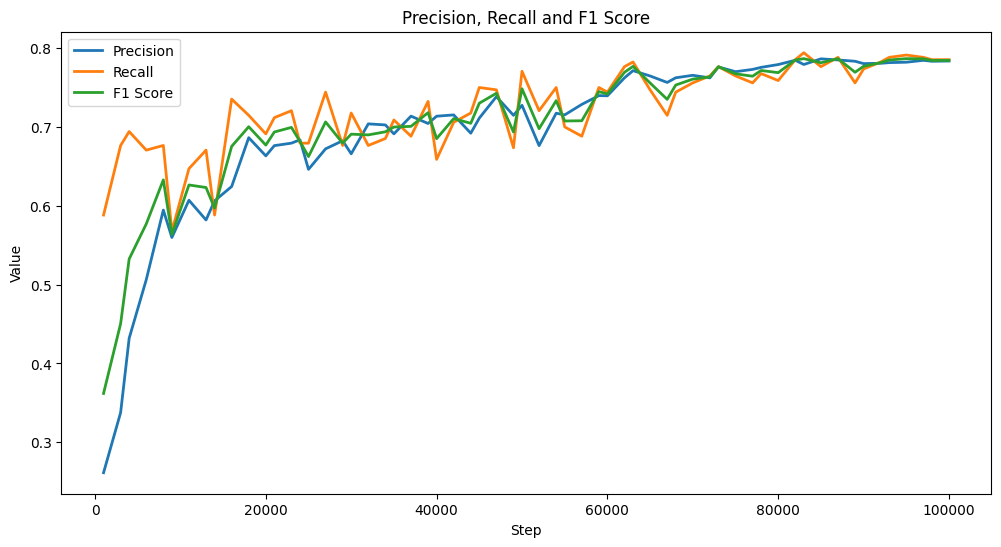

In [24]:
# Vẽ đồ thị precision, recall và f1_score
plt.figure(figsize=(12, 6))
plt.plot(df_precision['Step'], df_precision['Value'], label='Precision', linewidth=2)
plt.plot(df_recall['Step'], df_recall['Value'], label='Recall', linewidth=2)
plt.plot(df_f1_score['Step'], df_f1_score['Value'], label='F1 Score', linewidth=2)
plt.title('Precision, Recall and F1 Score')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.show()

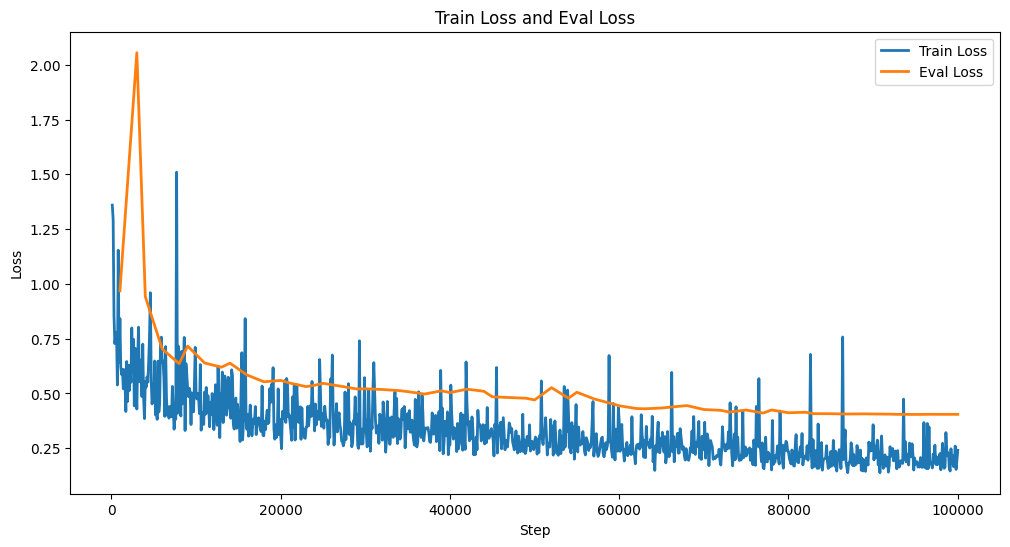

In [25]:
# Vẽ đồ thị train_loss và eval_loss
plt.figure(figsize=(12, 6))
plt.plot(df_train_loss['Step'], df_train_loss['Value'], label='Train Loss', linewidth=2)
plt.plot(df_eval_loss['Step'], df_eval_loss['Value'], label='Eval Loss', linewidth=2)
plt.title('Train Loss and Eval Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
import numpy as np

In [30]:
from object_detection.utils import label_map_util

In [11]:
label_path = r'Tensorflow\workspace\annotations\label_map.pbtxt'
MAIN_FOLDER_PATH = os.getcwd()

In [12]:
categories = label_map_util.create_category_index_from_labelmap(os.path.join(MAIN_FOLDER_PATH, label_path))

In [13]:
categories

{1: {'id': 1, 'name': 'head'}, 2: {'id': 2, 'name': 'helmet'}}

In [15]:
IOU_THRESHOLD = 0.5

In [132]:
def display(confusion_matrix, categories):
    '''
    Displays confusion matrix as pandas df to terminal and saves as CSV
    Args:
      confusion_matrix: matrix to be displayed
      categories: ordered array of class IDs
      output_path: where to save CSV
    '''
    results = []

    for i in range(1, len(categories) + 1):
        id = categories[i]['id'] - 1
        name = categories[i]['name']
        
        total_target = np.sum(confusion_matrix[id,:])
        total_predicted = np.sum(confusion_matrix[:,id])
        
        precision = float(confusion_matrix[id, id] / total_predicted)
        recall = float(confusion_matrix[id, id] / total_target)
        
        results.append({'category' : name, f'precision_@{IOU_THRESHOLD}IOU' : precision, f'recall_@{IOU_THRESHOLD}IOU' : recall})
    
    df = pd.DataFrame(results)
    accuracies = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    # Tính toán F1 Score
    df['f1_score_@0.5IOU'] = 2 * (df['precision_@0.5IOU'] * df['recall_@0.5IOU']) / (df['precision_@0.5IOU'] + df['recall_@0.5IOU'])
    # Vẽ biểu đồ
    ax1.set_title('Biểu đồ Precision, Recall, F1 Score @0.5IOU')
    ax1 = df.plot(y=['precision_@0.5IOU', 'recall_@0.5IOU', 'f1_score_@0.5IOU'], kind='bar', figsize=(10,7),
                  ax=ax1, label=['precision_@0.5IOU', 'recall_@0.5IOU', 'f1_score_@0.5IOU'], width=0.7)
    # Xoay nhãn về thẳng
    ax1.set_xticklabels(df['category'], rotation=0)
    ax1.set_ylabel('Giá trị', rotation=0, labelpad=30)
    # Hiện giá trị các nhãn trên cột và canh giữa
    for p in ax1.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax1.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center')
    ax1.legend(loc='lower right')
    # Calculate accuracy
    accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
    ax2.set_title('Model Accuracy')
    # Plot 'total_accuracy'
    ax2.bar('accuracy', accuracy, color='blue', label='accuracy', width=0.7)
    ax2.set_xlim([-1, 1]) 
    for p in ax2.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax2.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center')
    ax2.legend(loc='lower right')

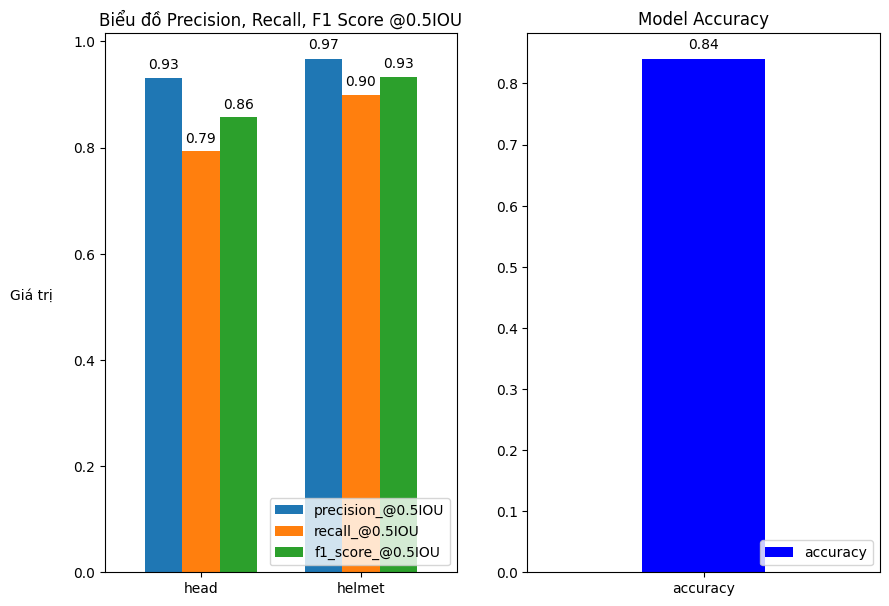

In [133]:
display(confusion_matrix, categories)